In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = r'/content/drive/MyDrive/data1.csv'  # Replace with the correct file path
ev_data = pd.read_csv(file_path)

# Drop any non-numeric columns or convert them to numeric
label_encoder = LabelEncoder()
ev_data['State_encoded'] = label_encoder.fit_transform(ev_data['State'])

# Selecting numeric features for clustering and PCA
features = ev_data.drop(columns=['Sl. No', 'State'])  # Adjust columns as needed
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
ev_data.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,State_encoded
0,1,Meghalaya,0,0,0,0,0,6,0,6,19
1,2,Nagaland,0,20,3,0,0,1,0,24,20
2,3,Manipur,16,8,11,0,5,12,0,52,18
3,4,Tripura,28,9,36,0,0,8,0,81,26
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82,0


In [ ]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenger Cars (Category M1 

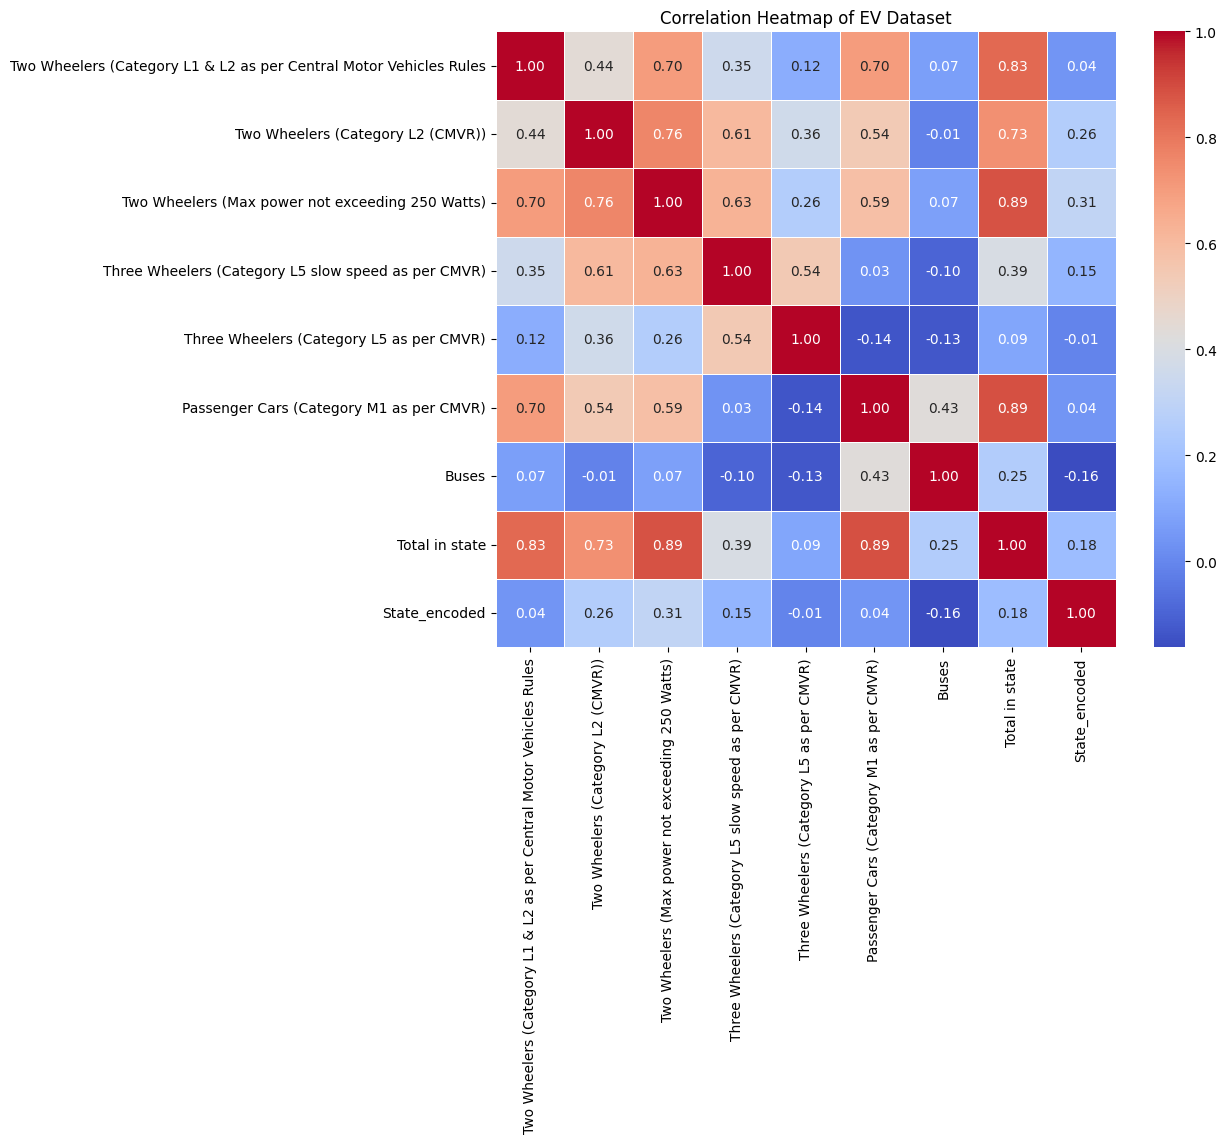

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix and heatmap
correlation_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of EV Dataset')
plt.show()

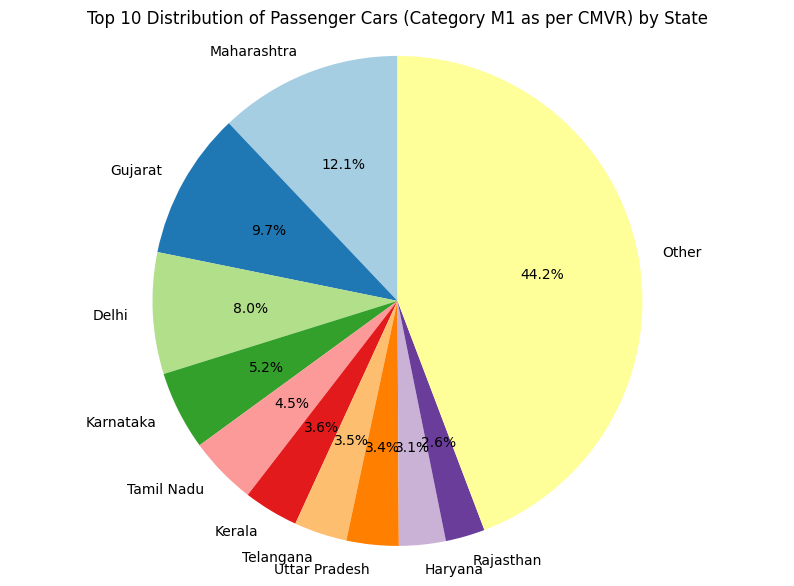

In [ ]:
# Pie Chart for distribution (e.g., 'Passenger Cars (Category M1 as per CMVR)')
column_to_plot = 'Passenger Cars (Category M1 as per CMVR)'  # Replace as needed
distribution = ev_data.groupby('State')[column_to_plot].sum()

# Sort and filter top 10 categories
top_categories = distribution.sort_values(ascending=False).head(10)
other_categories = distribution[10:].sum()
top_categories['Other'] = other_categories

plt.figure(figsize=(10, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Top 10 Distribution of {column_to_plot} by State')
plt.axis('equal')
plt.show()

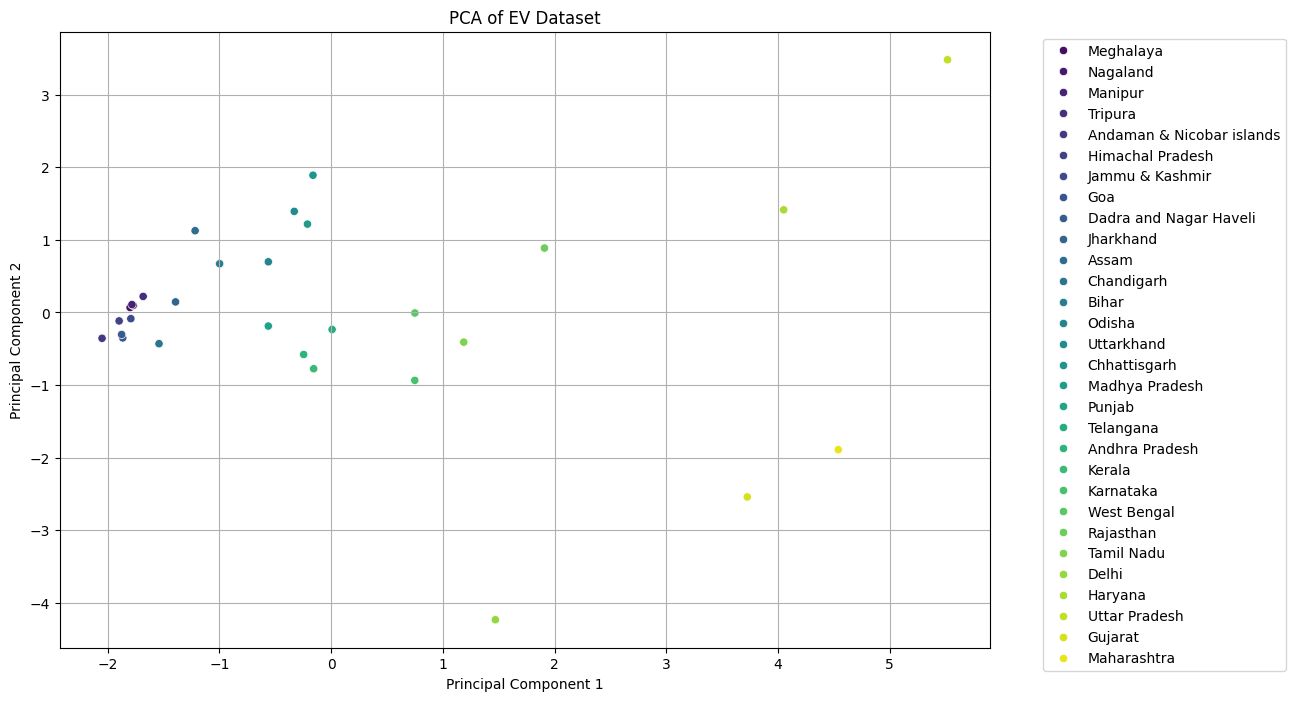

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['State'] = ev_data['State']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='State', palette='viridis')
plt.title('PCA of EV Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
ev_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

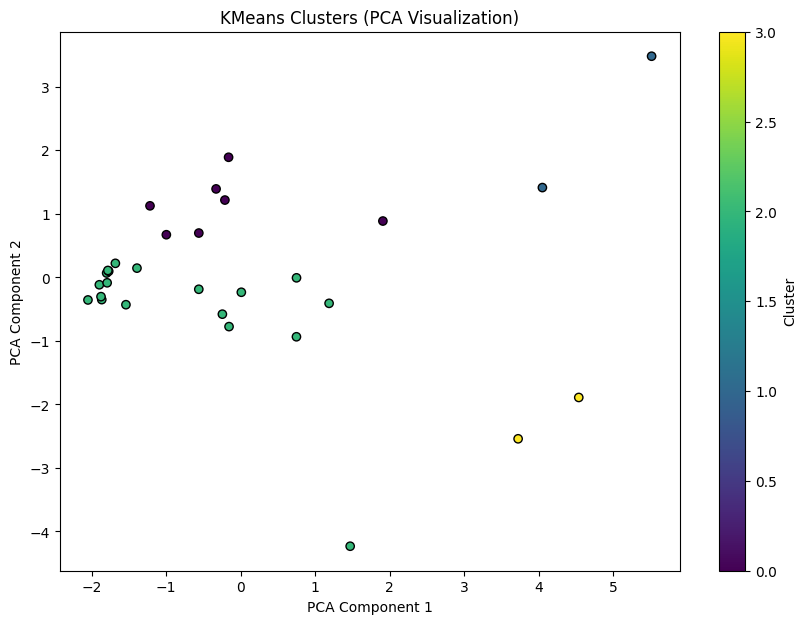

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the KMeans clusters based on PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=ev_data['KMeans_Cluster'], cmap='viridis', edgecolor='k')
plt.title('KMeans Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

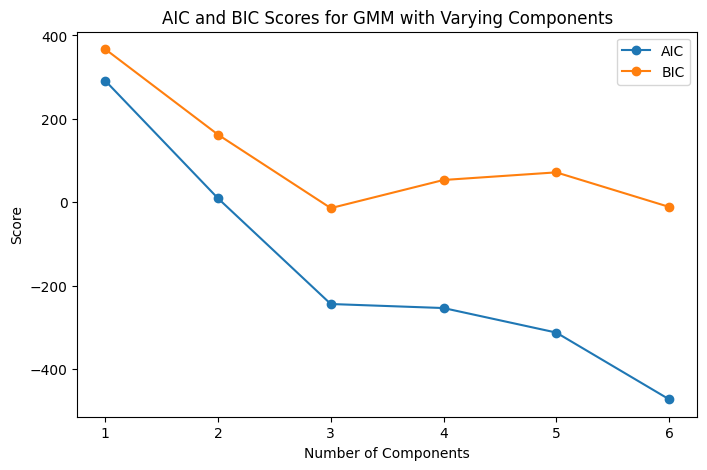

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# AIC and BIC for GMM with different components
n_components = np.arange(1, 7)
gmm_models = [GaussianMixture(n, random_state=0).fit(scaled_features) for n in n_components]
aic = [model.aic(scaled_features) for model in gmm_models]
bic = [model.bic(scaled_features) for model in gmm_models]

plt.figure(figsize=(8, 5))
plt.plot(n_components, aic, label='AIC', marker='o')
plt.plot(n_components, bic, label='BIC', marker='o')
plt.title('AIC and BIC Scores for GMM with Varying Components')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
# Segment profiling using cluster centers
kmeans_centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:\n", kmeans_centers)

KMeans Cluster Centers:
 [[-0.17261163  0.04417498 -0.14841316  0.21382284  1.27490812 -0.46868387
  -0.23863922 -0.31257872 -0.05776713]
 [ 1.46803686  2.37410129  2.50618335  3.37625788  1.40975417  0.3437203
  -0.23863922  1.66271985  0.46213703]
 [-0.37893011 -0.38390673 -0.34490832 -0.39945719 -0.56519206 -0.16616799
   0.11024853 -0.31850027 -0.00912113]
 [ 2.7359399   1.11840023  1.2898917  -0.32979455 -0.50260801  2.8752691
   0.02651547  2.4570582  -0.17330139]]


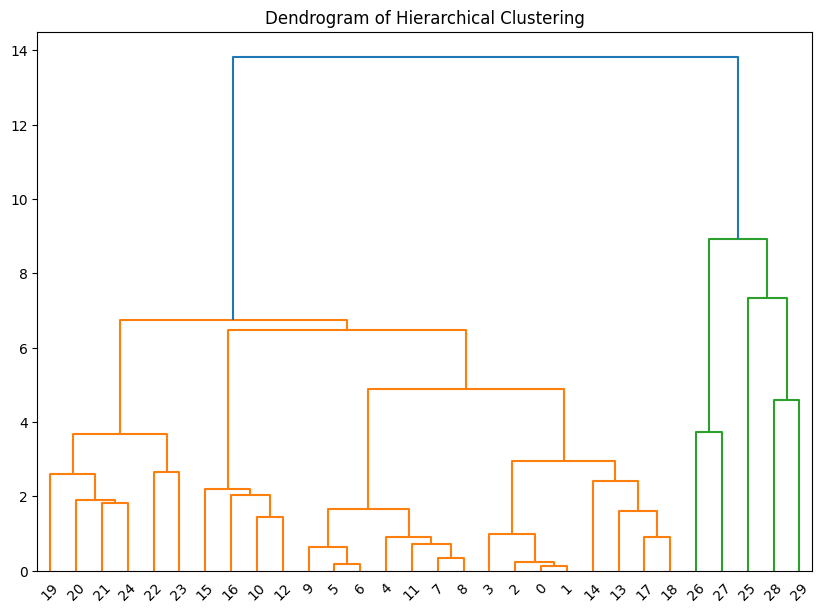

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogram for hierarchical clustering
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()

In [ ]:
# Cluster counts
kmeans_cluster_counts = ev_data['KMeans_Cluster'].value_counts()
print("KMeans Cluster Counts:\n", kmeans_cluster_counts)

KMeans Cluster Counts:
 KMeans_Cluster
2    19
0     7
1     2
3     2
Name: count, dtype: int64


<Figure size 1400x1000 with 0 Axes>

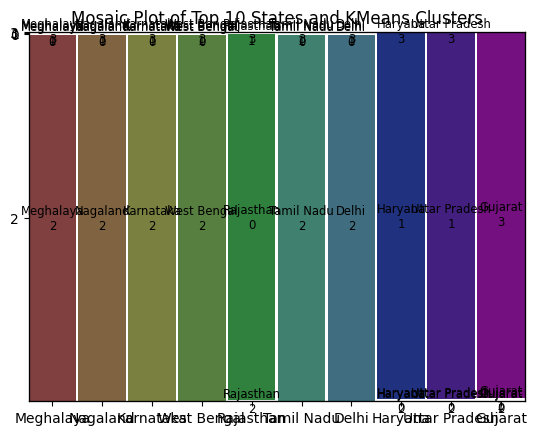

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Aggregate states with fewer data points
top_states = ev_data['State'].value_counts().nlargest(10).index  # Select top 10 states
ev_data_filtered = ev_data[ev_data['State'].isin(top_states)]  # Filter the dataset for these states

# Larger figure size for better clarity
plt.figure(figsize=(14, 10))

# Mosaic plot with filtered data
mosaic(ev_data_filtered, ['State', 'KMeans_Cluster'])

plt.title('Mosaic Plot of Top 10 States and KMeans Clusters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()c

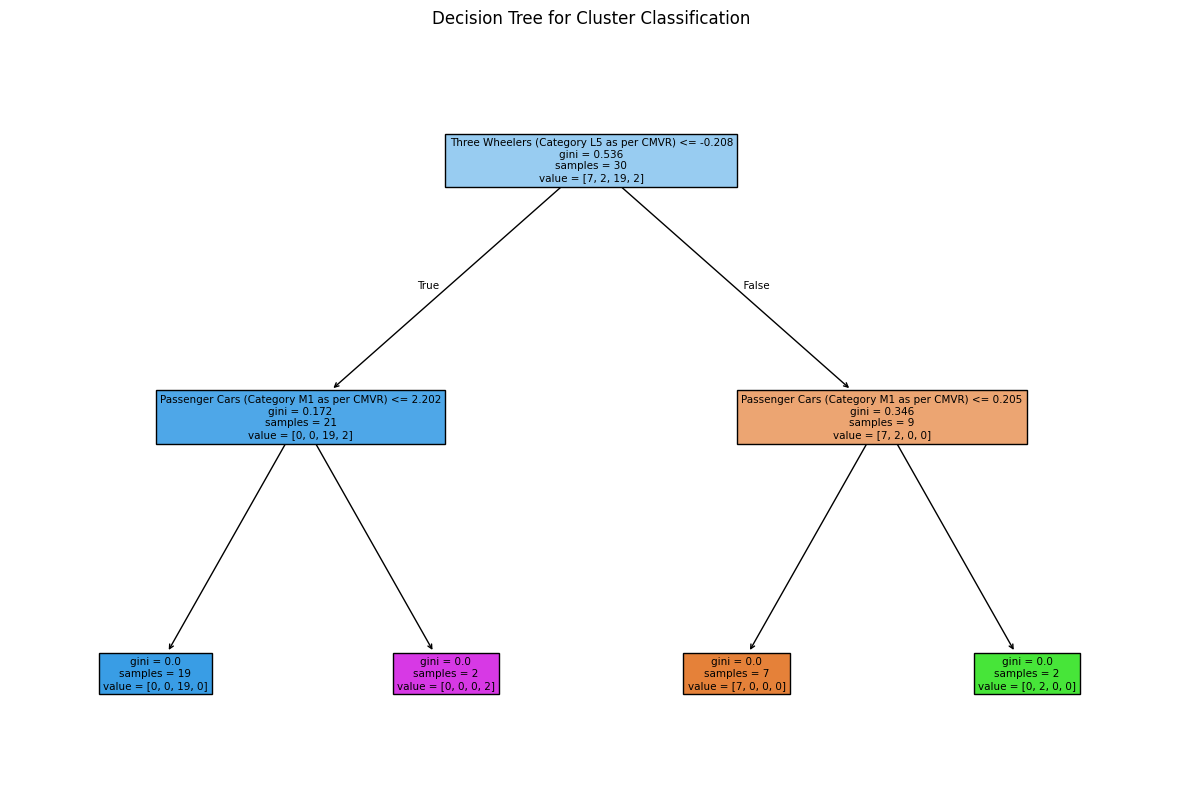

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Decision Tree Classifier
X = scaled_features
y = ev_data['KMeans_Cluster']  # Predicting clusters
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X, y)

# Visualize decision tree structure
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=features.columns)
plt.title('Decision Tree for Cluster Classification')
plt.show()